# Análisis de los datos del Dataset

### Importar librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#### Configuración de estilos para gráficos

In [4]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

#### Cargar el DataSet
Importamos el csv del DataSet y lo guardamos en la variable dataset

In [2]:
dataset = pd.read_csv("archivo_gym_members_exercise_tracking_version2.csv")
dataset.head()


,id,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Workout_Cardio,Workout_HIIT,Workout_Strength,Workout_Yoga
0,1,56,1,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,0,0,0,1
1,2,46,0,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00,0,1,0,0
2,3,32,0,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,1,0,0,0
3,4,25,1,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,0,0,1,0
4,5,38,1,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39,0,0,1,0


### Descripción general del Dataset
Comenzamos con una descripción básica del dataset: número de filas, columnas, nombres de las columnas y los tipos de datos

In [6]:
print(f"Dimensiones del Dataset: {dataset.shape}\n")
print(f"Tipos de datos de las columnas:\n{dataset.dtypes}")

Dimensiones del Dataset: (973, 19)

Tipos de datos de las columnas:
id                                 int64
Age                                int64
Gender                             int64
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                  float64
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
Workout_Cardio                     int64
Workout_HIIT                       int64
Workout_Strength                   int64
Workout_Yoga                       int64
dtype: object


### Análisis de valores nulos
Identificamos si alguna columna tiene valores nulos y la cantidad de datos faltantes por columna.

Esto es determinante hacerlo, ya que si obtenemos valores nulos o vacíos, pueden afectar el análisis y los modelos predictivos

In [5]:
print(f"Valores nulos por columna:\n\n{dataset.isnull().sum()}")
print(f"\nValores nulos Totales: {dataset.isnull().sum().sum()}")


Valores nulos por columna:

id                               0
Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
Workout_Cardio                   0
Workout_HIIT                     0
Workout_Strength                 0
Workout_Yoga                     0
dtype: int64

Valores nulos Totales: 0


### Estadísticas descriptivas
Calculamos estadísticas como la media, mediana, desviación estándar, los valores mínimos y máximos, etc. para las columnas numéricas.

Esto nos dará una visión rápida de cómo se distribuyen los datos en términos de tendencia central y dispersión.

In [10]:
print(f"Estadísticas descriptivas:")
dataset_sin_id = dataset.drop(columns=["id"])
dataset_sin_id.describe()

Estadísticas descriptivas:


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Workout_Cardio,Workout_HIIT,Workout_Strength,Workout_Yoga
count,973.000000,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,0.525180,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127,0.262076,0.227133,0.265159,0.245632
std,12.180928,0.499622,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879,0.439990,0.419194,0.441645,0.430683
min,18.000000,0.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,1.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,1.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000,1.000000,0.000000,1.000000,0.000000
max,59.000000,1.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000,1.000000,1.000000,1.000000,1.000000


#### Análisis de repetición de usuarios (por combinación clave)
Para entender si las sesiones corresponden a usuarios que han entrenado varias veces, 
agrupamos por las variables físicas y demográficas que identifican a cada persona (edad, género, altura) y contamos cuántas sesiones tiene cada uno.

In [9]:
# Definir columnas clave para identificar usuario (edad, género, altura)
user_keys = ['Age', 'Gender', 'Height (m)']

# Contar sesiones por usuario (basado en estas columnas)
session_counts = dataset.groupby(user_keys).size().reset_index(name='session_count')

# Usuarios con más de una sesión
repeated_users = session_counts[session_counts['session_count'] > 1]
print(f"Número de usuarios con más de una sesión: {len(repeated_users)}")

# Mostrar ejemplos de usuarios repetidos
print(repeated_users.head())

Número de usuarios con más de una sesión: 131
    Age  Gender  Height (m)  session_count
0    18       0        1.53              2
2    18       0        1.55              2
4    18       0        1.59              2
9    18       0        1.75              2
23   19       0        1.52              2


#### Distribución y análisis por variables físicas y fisiológicas
Visualizamos las distribuciones de los principales atributos físicos y la actividad física para entender su comportamiento general en el conjunto de sesiones.

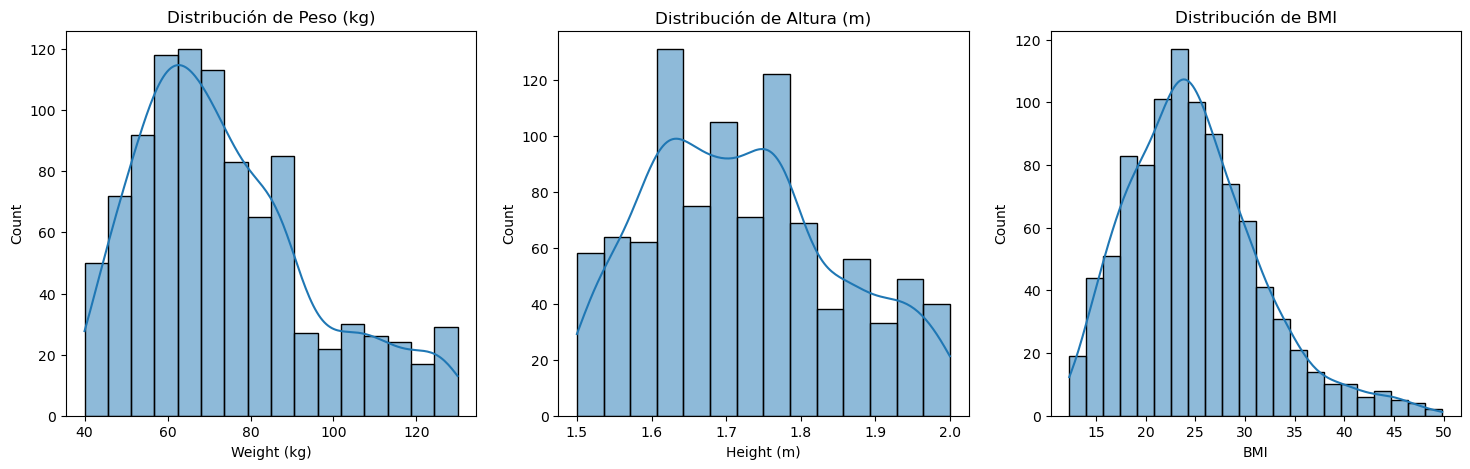

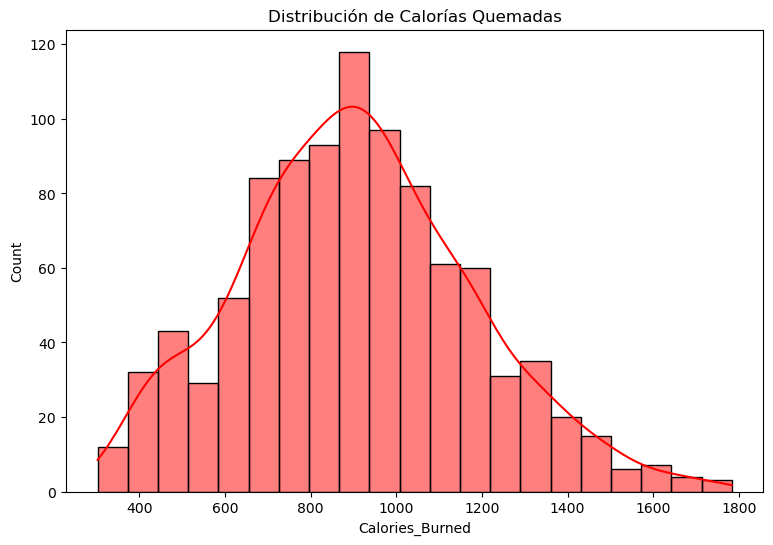

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de peso, altura y BMI
fig, axs = plt.subplots(1, 3, figsize=(18,5))
sns.histplot(dataset['Weight (kg)'], kde=True, ax=axs[0])
axs[0].set_title('Distribución de Peso (kg)')
sns.histplot(dataset['Height (m)'], kde=True, ax=axs[1])
axs[1].set_title('Distribución de Altura (m)')
sns.histplot(dataset['BMI'], kde=True, ax=axs[2])
axs[2].set_title('Distribución de BMI')
plt.show()

# Distribución de calorías quemadas
plt.figure(figsize=(9, 6))
sns.histplot(dataset['Calories_Burned'], kde=True, color='red')
plt.title('Distribución de Calorías Quemadas')

plt.show()


#### Análisis por grupos (género, experiencia)
Comparamos cómo varían el peso y las calorías quemadas según el género y el nivel de experiencia para detectar diferencias importantes en la muestra.

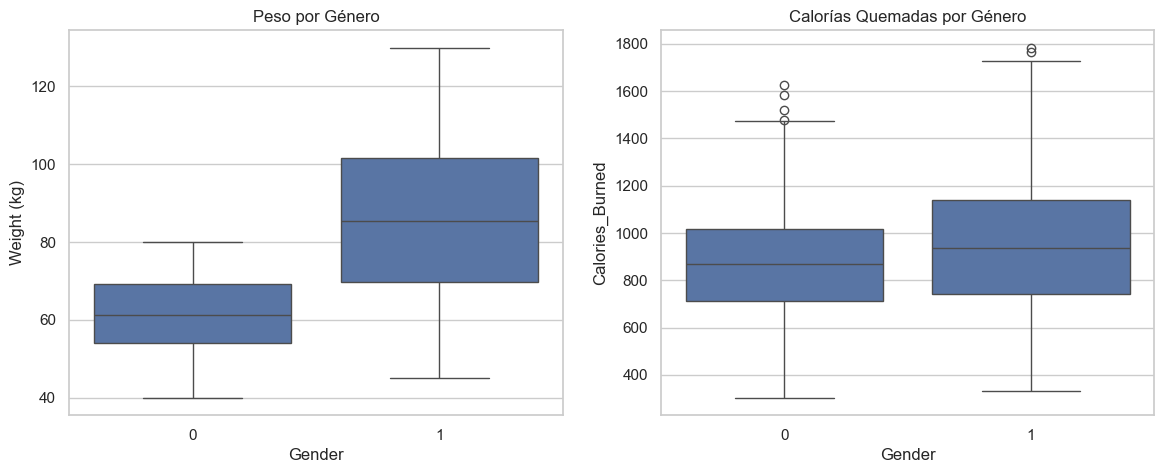

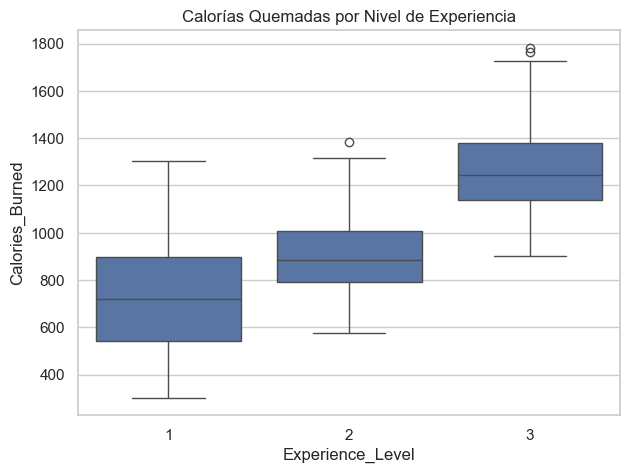

In [11]:
# Boxplots por género para peso y calorías quemadas
fig, axs = plt.subplots(1, 2, figsize=(14,5))
sns.boxplot(x='Gender', y='Weight (kg)', data=dataset, ax=axs[0])
axs[0].set_title('Peso por Género')
sns.boxplot(x='Gender', y='Calories_Burned', data=dataset, ax=axs[1])
axs[1].set_title('Calorías Quemadas por Género')
plt.show()

# Boxplot por nivel de experiencia para calorías quemadas
plt.figure(figsize=(7,5))
sns.boxplot(x='Experience_Level', y='Calories_Burned', data=dataset)
plt.title('Calorías Quemadas por Nivel de Experiencia')
plt.show()


### Correlación entre variables
Analizamos la correlación entre las variables numéricas para identificar relaciones importantes. Esto ayuda a descubrir cómo interactúan entre sí las características del dataset.


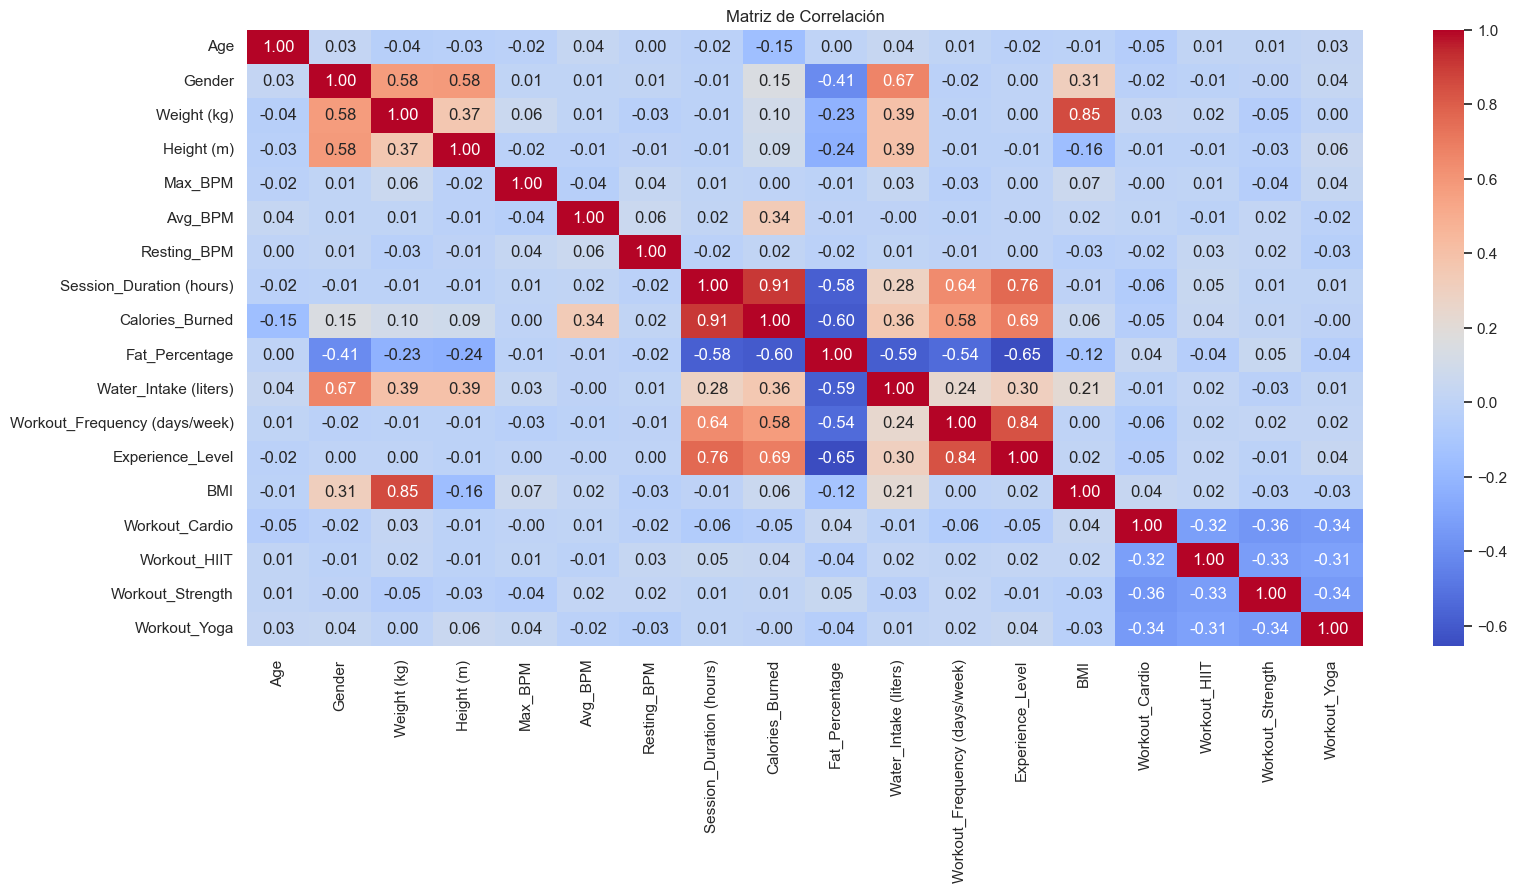

In [12]:

# Antes de eso vamos a seleccionar solo las columnas numéricas, excluyendo 'Workout_Type' 'id'
numeric_columns = dataset.drop(columns=['id']).select_dtypes(include=['number'])

plt.figure(figsize=(18, 8))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()



### Análisis de variables categóricas
Para las columnas categóricas ("Gender"), contamos las frecuencias de cada categoría y haremos gráficos de barras para mostrar la distribución.


Distribución de Gender:
Gender
1    511
0    462
Name: count, dtype: int64


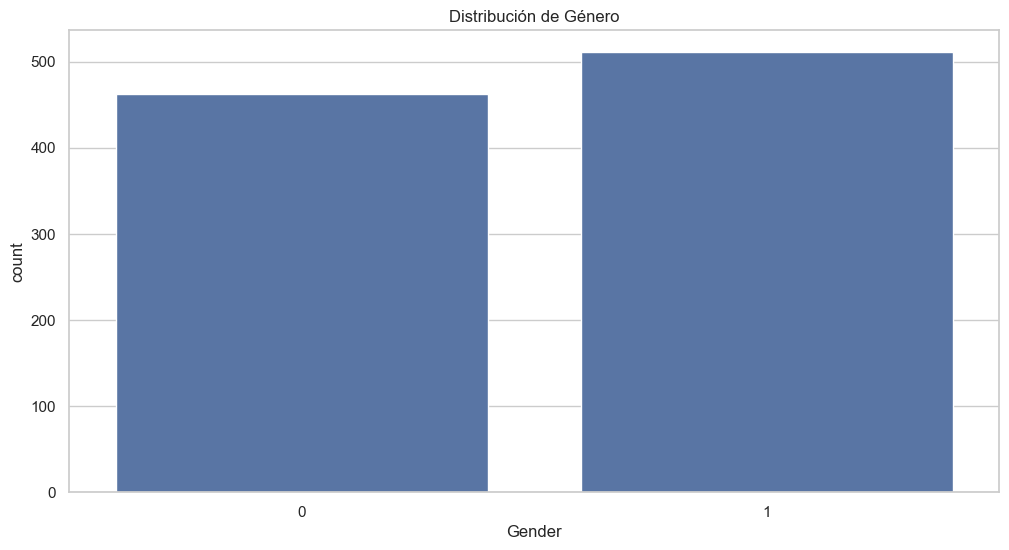

In [13]:
# Ver la distribución de la columna 'Gender'
print(f"Distribución de Gender:\n{dataset['Gender'].value_counts()}")

# Grafica de la distribución de género
sns.countplot(x='Gender', data=dataset)
plt.title('Distribución de Género')
plt.show()

#### Detección de outliers en variables clave
Detectamos valores atípicos para las variables físicas y las calorías quemadas que puedan afectar la calidad de los modelos.

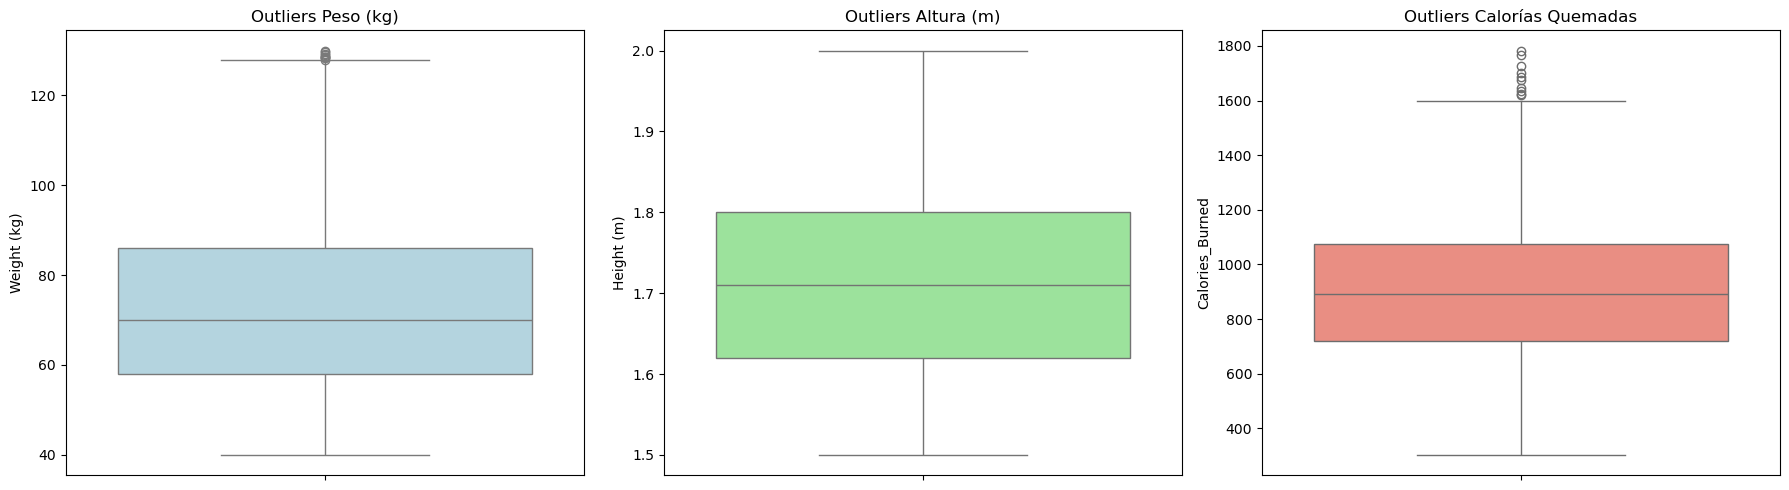

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear los boxplots con colores personalizados
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(y=dataset['Weight (kg)'], ax=axs[0], color='lightblue')
axs[0].set_title('Outliers Peso (kg)')

sns.boxplot(y=dataset['Height (m)'], ax=axs[1], color='lightgreen')
axs[1].set_title('Outliers Altura (m)')

sns.boxplot(y=dataset['Calories_Burned'], ax=axs[2], color='salmon')
axs[2].set_title('Outliers Calorías Quemadas')

plt.tight_layout()
plt.show()



### Distribución de atributos físicos
Estudiamos atributos físicos, como "Weight (kg)", "Height (m)", y "BMI", para ver cómo se distribuyen y si hay alguna tendencia importante entre ellos.


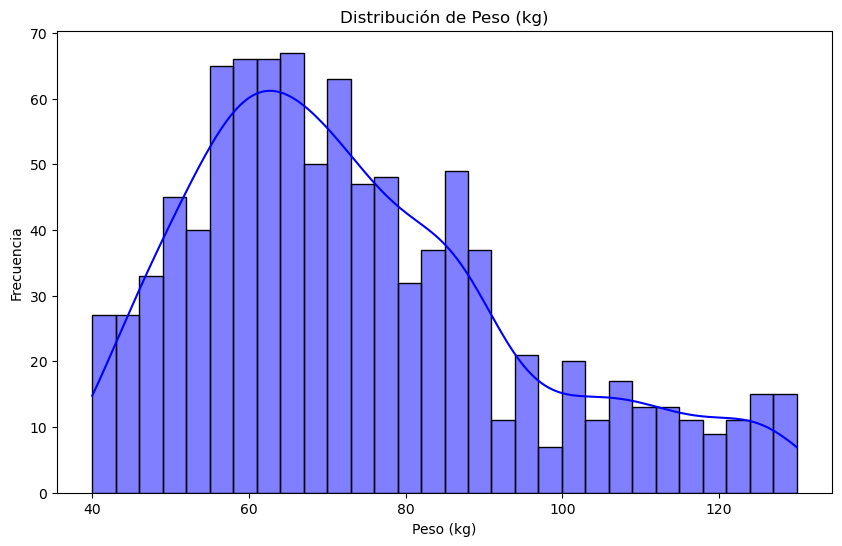

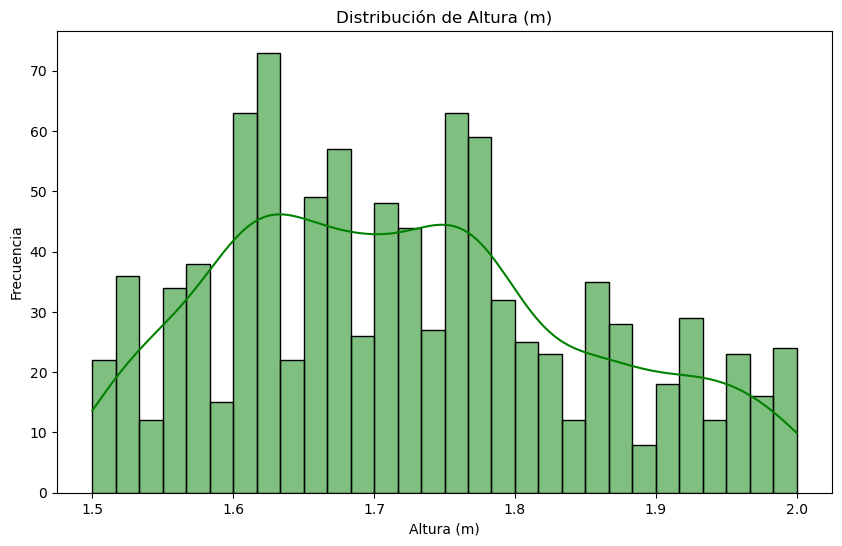

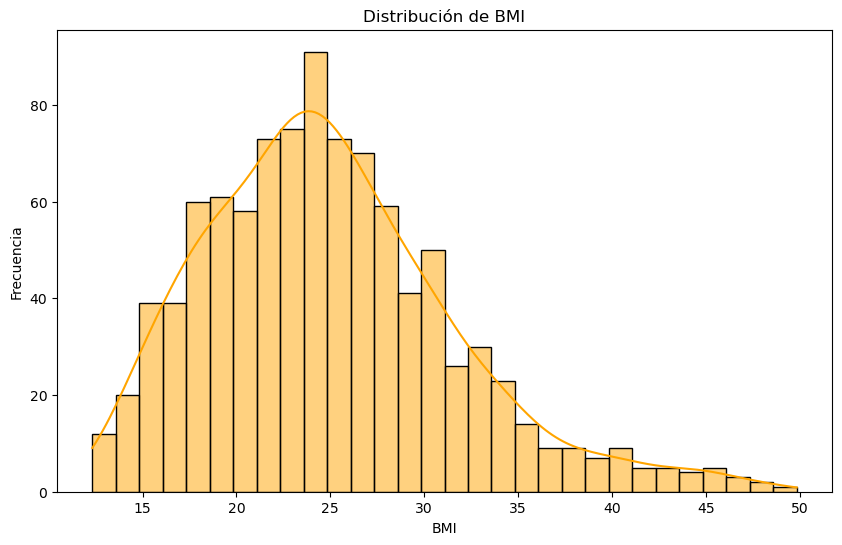

In [10]:
# Visualizar la distribución de Weight (kg)
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Weight (kg)'], kde=True, bins=30, color='blue')
plt.title('Distribución de Peso (kg)')
plt.xlabel('Peso (kg)')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar la distribución de Height (m)
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Height (m)'], kde=True, bins=30, color='green')
plt.title('Distribución de Altura (m)')
plt.xlabel('Altura (m)')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar la distribución del BMI
plt.figure(figsize=(10, 6))
sns.histplot(dataset['BMI'], kde=True, bins=30, color='orange')
plt.title('Distribución de BMI')
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.show()

#### Matriz de dispersión para variables físicas
Visualizamos relaciones bivariadas entre variables físicas, diferenciadas por género, para entender posibles patrones o agrupamientos naturales.

c:\Users\carlo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


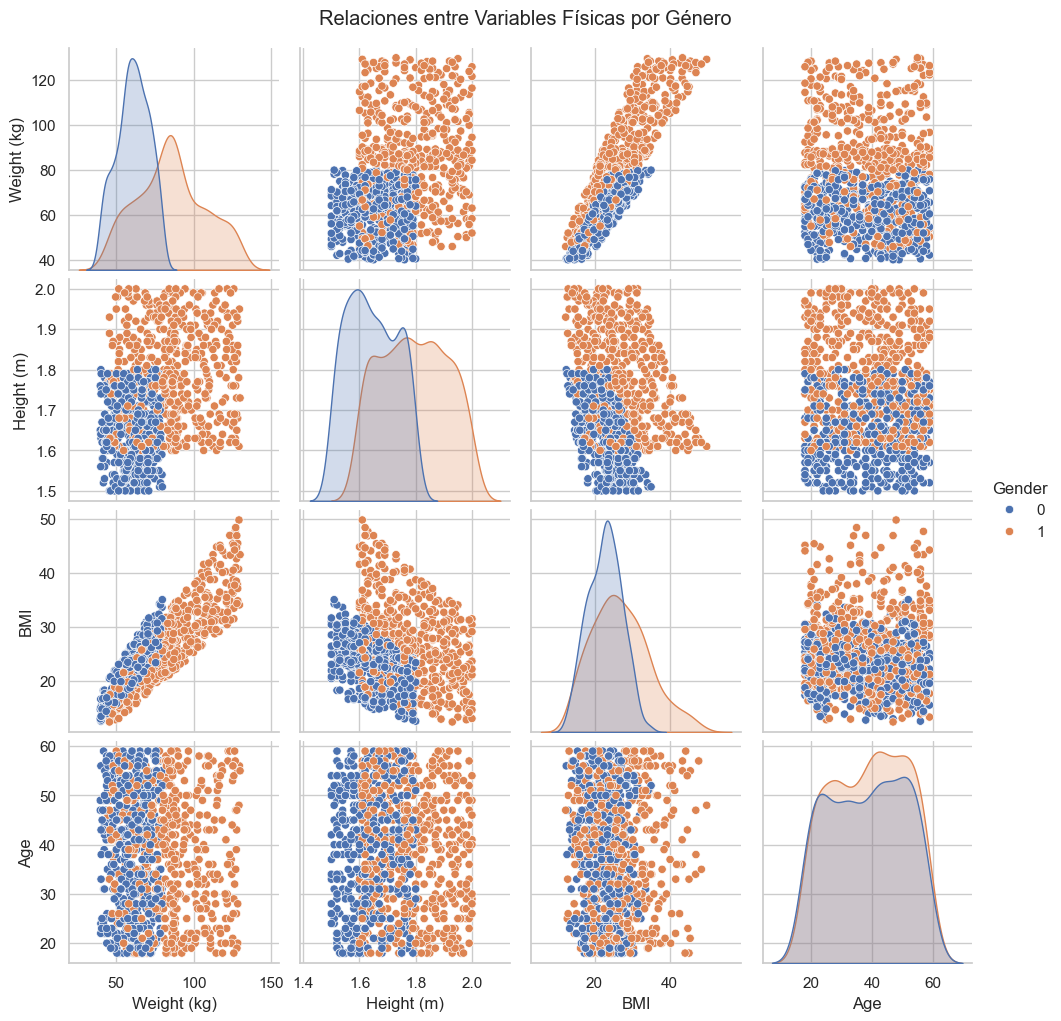

In [15]:
sns.pairplot(dataset, vars=['Weight (kg)', 'Height (m)', 'BMI', 'Age'], hue='Gender')
plt.suptitle('Relaciones entre Variables Físicas por Género', y=1.02)
plt.show()

### Análisis de nivel de experiencia y frecuencia de entrenamiento

Distribución de Experience_Level:
Experience_Level
2    406
1    376
3    191
Name: count, dtype: int64


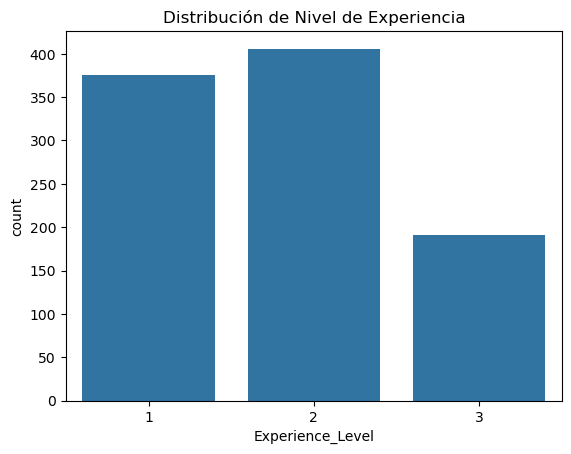

Distribución de Workout_Frequency:
Workout_Frequency (days/week)
3    368
4    306
2    197
5    102
Name: count, dtype: int64


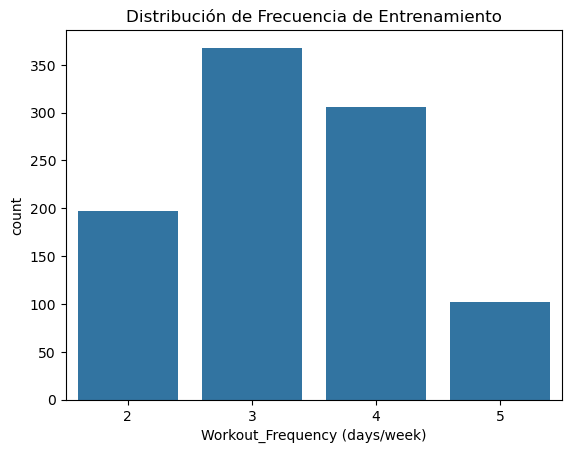

In [11]:
# Ver la distribución de la columna 'Experience_Level'
print(f"Distribución de Experience_Level:\n{dataset['Experience_Level'].value_counts()}")

# Graficar la distribución del nivel de experiencia
sns.countplot(x='Experience_Level', data=dataset)
plt.title('Distribución de Nivel de Experiencia')
plt.show()

# Ver la distribución de la columna 'Workout_Frequency'
print(f"Distribución de Workout_Frequency:\n{dataset['Workout_Frequency (days/week)'].value_counts()}")

# Graficar la distribución de la frecuencia de entrenamiento
sns.countplot(x='Workout_Frequency (days/week)', data=dataset)
plt.title('Distribución de Frecuencia de Entrenamiento')
plt.show()


### Rango de los Atributos Físicos

Determinamos los rangos de las variables físicas clave, como el peso, la altura y el BMI, para entender mejor los valores extremos.

In [12]:
# Rango de Peso y Altura
print("Rango de Peso:", dataset['Weight (kg)'].min(), "-", dataset['Weight (kg)'].max())
print("Percentiles del Peso:", dataset['Weight (kg)'].quantile([0.25, 0.5, 0.75]))

print("Rango de Altura:", dataset['Height (m)'].min(), "-", dataset['Height (m)'].max())
print("Percentiles de Altura:", dataset['Height (m)'].quantile([0.25, 0.5, 0.75]))

# Rango de BMI
print("Rango de BMI:", dataset['BMI'].min(), "-", dataset['BMI'].max())
print("Percentiles del BMI:", dataset['BMI'].quantile([0.25, 0.5, 0.75]))

Rango de Peso: 40.0 - 129.9
Percentiles del Peso: 0.25    58.1
0.50    70.0
0.75    86.0
Name: Weight (kg), dtype: float64
Rango de Altura: 1.5 - 2.0
Percentiles de Altura: 0.25    1.62
0.50    1.71
0.75    1.80
Name: Height (m), dtype: float64
Rango de BMI: 12.32 - 49.84
Percentiles del BMI: 0.25    20.11
0.50    24.16
0.75    28.56
Name: BMI, dtype: float64


### Porcentaje de Personas con BMI Saludable
Analizamos cuántas personas tienen un BMI dentro del rango saludable (18.5-24.9)


In [13]:
# Identificar las personas con BMI saludable
healthy_bmi = dataset[(dataset['BMI'] >= 18.5) & (dataset['BMI'] <= 24.9)]
print(f"Porcentaje de personas con BMI saludable: {len(healthy_bmi) / len(dataset) * 100}%")


Porcentaje de personas con BMI saludable: 37.61562178828366%


### Transformación de Variables para Mejor Clustering
Si algún atributo muestra una distribución sesgada, podemos aplicar transformaciones. Por ejemplo, transformamos el BMI si es necesario

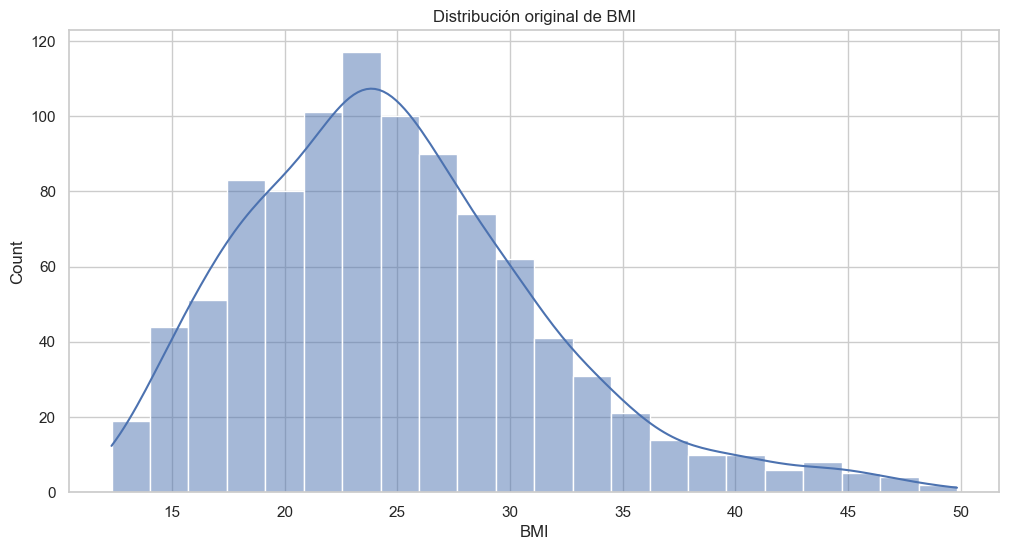

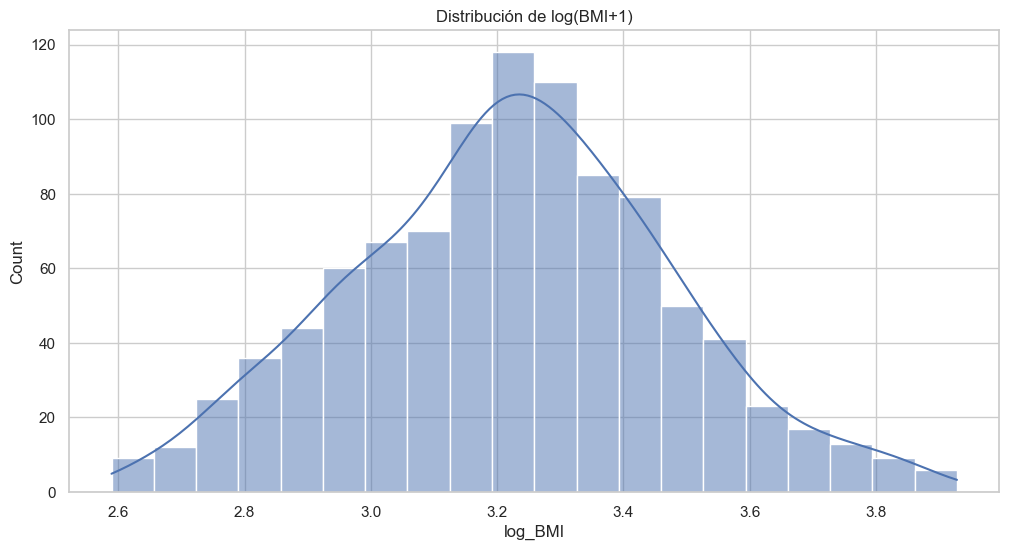

In [ ]:
# Revisar si BMI está sesgado y aplicar log1p para normalizar
sns.histplot(dataset['BMI'], kde=True)
plt.title('Distribución original de BMI')
plt.show()

dataset['log_BMI'] = np.log1p(dataset['BMI'])

sns.histplot(dataset['log_BMI'], kde=True)
plt.title('Distribución de log(BMI+1)')
plt.show()


#### Análisis de sesiones múltiples por usuario
Este bloque agrupa las sesiones por usuario definido por edad, género y altura (considerados como ID aproximado). Selecciona solo los usuarios que tienen más de una sesión y muestra un subconjunto para que puedas analizar las diferencias entre sus sesiones en términos de calorías quemadas, duración y tipo de ejercicio.

Además calcula un resumen estadístico (media, desviación típica, conteo) para cuantificar la variabilidad entre sesiones del mismo usuario.

In [17]:
# Identificar usuarios con más de una sesión (por Age, Gender, Height)
user_sessions = dataset.groupby(['Age', 'Gender', 'Height (m)'])

# Filtrar solo usuarios con más de 1 sesión
multi_sessions = user_sessions.filter(lambda x: len(x) > 1)

print(f"Número total de sesiones de usuarios con más de una sesión: {multi_sessions.shape[0]}")

# Mostrar algunas sesiones de usuarios repetidos para análisis
display(multi_sessions.sort_values(['Age', 'Gender', 'Height (m)']).head(10))

# Opcional: resumen estadístico de la variabilidad en calorías quemadas por usuario
variability = multi_sessions.groupby(['Age', 'Gender', 'Height (m)'])['Calories_Burned'].agg(['mean', 'std', 'count'])
print(variability.head())

# Visualizar ejemplo de sesiones de un usuario (primer grupo con >1 sesión)
example_user = list(multi_sessions.groupby(['Age', 'Gender', 'Height (m)']).groups.keys())[0]
print(f"Ejemplo usuario (Age, Gender, Height): {example_user}")
user_sessions.get_group(example_user)[['Calories_Burned', 'Session_Duration (hours)', 'Workout_HIIT', 'Workout_Strength', 'Workout_Yoga', 'Workout_Cardio']]


Número total de sesiones de usuarios con más de una sesión: 279


,id,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Workout_Cardio,Workout_HIIT,Workout_Strength,Workout_Yoga,log_BMI
440,441,18,0,64.8,1.53,170,141,54,1.98,1396.0,18.6,2.7,5,3,27.68,0,0,0,1,3.356200
653,654,18,0,50.7,1.53,181,147,52,1.29,948.0,33.0,2.1,3,2,21.66,0,0,0,1,3.120601
353,354,18,0,72.7,1.55,172,125,56,0.84,525.0,29.8,2.0,3,1,30.26,1,0,0,0,3.442339
563,564,18,0,65.3,1.55,184,161,59,1.42,1143.0,28.5,2.2,3,2,27.18,0,0,0,1,3.338613
229,230,18,0,63.9,1.59,185,125,50,1.87,1169.0,16.4,2.7,4,3,25.28,0,0,1,0,3.268808
397,398,18,0,62.0,1.59,190,162,50,1.23,996.0,33.2,2.2,4,2,24.52,0,0,1,0,3.239462
771,772,18,0,57.2,1.75,193,160,74,1.29,1032.0,33.5,2.4,3,2,18.68,1,0,0,0,2.979603
904,905,18,0,66.9,1.75,170,122,61,0.94,573.0,26.8,1.7,2,1,21.84,0,0,0,1,3.128513
192,193,19,0,65.2,1.52,188,130,71,1.23,800.0,30.6,2.4,3,1,28.22,1,0,0,0,3.374853
333,334,19,0,48.3,1.52,186,136,56,0.96,653.0,26.3,1.6,2,1,20.91,0,0,1,0,3.086943


                         mean         std  count
Age Gender Height (m)                           
18  0      1.53        1172.0  316.783838      2
           1.55         834.0  436.991991      2
           1.59        1082.5  122.329473      2
           1.75         802.5  324.562013      2
19  0      1.52         726.5  103.944697      2
Ejemplo usuario (Age, Gender, Height): (18, 0, 1.53)


,Calories_Burned,Session_Duration (hours),Workout_HIIT,Workout_Strength,Workout_Yoga,Workout_Cardio
440,1396.0,1.98,0,0,1,0
653,948.0,1.29,0,0,1,0


#### Análisis de las variables físicas y las calorías quemadas según el tipo de entrenamiento
Este análisis muestra cómo varían diferentes atributos físicos y la cantidad de calorías quemadas según el tipo de entrenamiento realizado en cada sesión.
Las gráficas de caja permiten observar la mediana, dispersión y posibles valores atípicos para cada grupo de entrenamiento, facilitando la comprensión de las diferencias o similitudes entre ellos.

Por ejemplo, podemos analizar si los entrenamientos de HIIT generan más calorías quemadas o si ciertos tipos de ejercicio están asociados con perfiles físicos específicos.

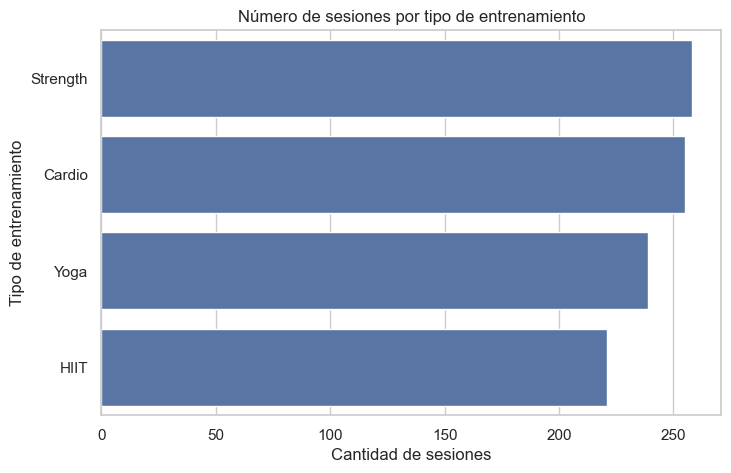

In [19]:
# Variables de tipo de entrenamiento (binarias)
workout_types = ['Workout_HIIT', 'Workout_Strength', 'Workout_Yoga', 'Workout_Cardio']

# Creamos una nueva columna 'Workout_Type_Summary' para saber qué tipo de entrenamiento hizo cada sesión
def tipo_entrenamiento(row):
    tipos = [wt.replace('Workout_', '') for wt in workout_types if row[wt] == 1]
    if len(tipos) == 0:
        return 'None'
    return ', '.join(tipos)

dataset['Workout_Type_Summary'] = dataset.apply(tipo_entrenamiento, axis=1)

# Ver distribución de sesiones por tipo de entrenamiento
plt.figure(figsize=(8,5))
sns.countplot(y='Workout_Type_Summary', data=dataset, order=dataset['Workout_Type_Summary'].value_counts().index)
plt.title('Número de sesiones por tipo de entrenamiento')
plt.xlabel('Cantidad de sesiones')
plt.ylabel('Tipo de entrenamiento')
plt.show()

## Visualizaciones complementarias

### Gráficos de dispersión (scatter plots) de variables físicas frente a calorías quemadas
· Mostrar cómo el peso y el BMI se relacionan con las calorías quemadas.

· Colorear por género para ver diferencias visuales.

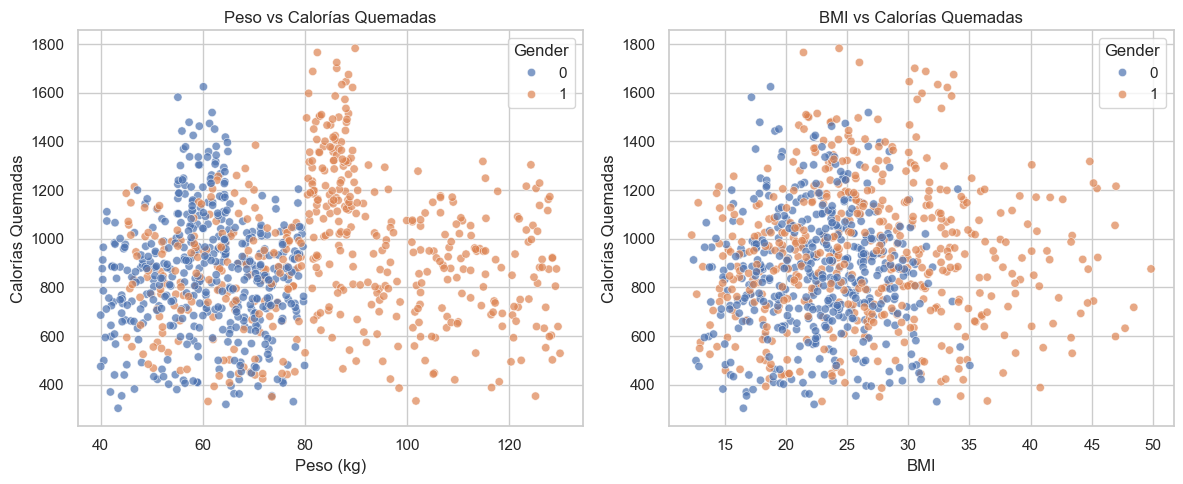

In [22]:
plt.figure(figsize=(12, 5))

# Scatter plot: Peso vs Calorías Quemadas
plt.subplot(1, 2, 1)
sns.scatterplot(x='Weight (kg)', y='Calories_Burned', hue='Gender', data=dataset, alpha=0.7)
plt.title('Peso vs Calorías Quemadas')
plt.xlabel('Peso (kg)')
plt.ylabel('Calorías Quemadas')

# Scatter plot: BMI vs Calorías Quemadas
plt.subplot(1, 2, 2)
sns.scatterplot(x='BMI', y='Calories_Burned', hue='Gender', data=dataset, alpha=0.7)
plt.title('BMI vs Calorías Quemadas')
plt.xlabel('BMI')
plt.ylabel('Calorías Quemadas')

plt.tight_layout()
plt.show()


### Boxplots de calorías quemadas según nivel de experiencia
Mostrar si los más experimentados queman más o menos calorías

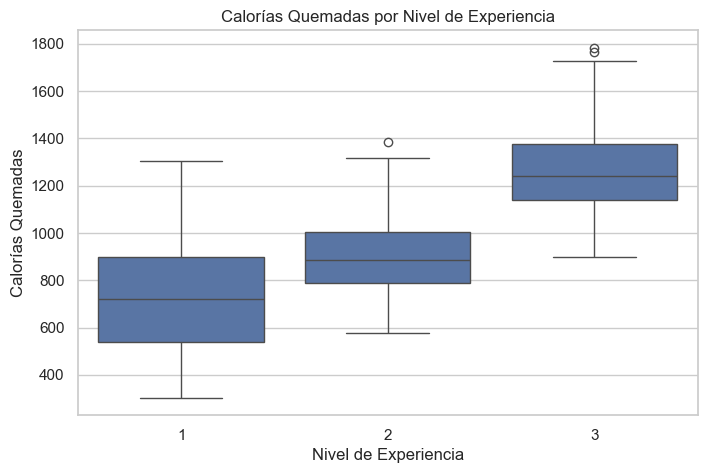

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Experience_Level', y='Calories_Burned', data=dataset)
plt.title('Calorías Quemadas por Nivel de Experiencia')
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Calorías Quemadas')
plt.show()


### Boxplots de calorías quemadas según frecuencia de entrenamiento semanal

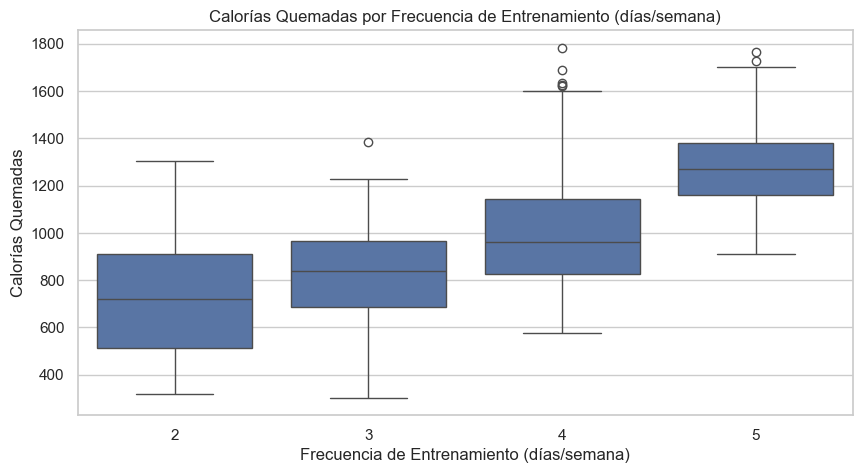

In [24]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Workout_Frequency (days/week)', y='Calories_Burned', data=dataset)
plt.title('Calorías Quemadas por Frecuencia de Entrenamiento (días/semana)')
plt.xlabel('Frecuencia de Entrenamiento (días/semana)')
plt.ylabel('Calorías Quemadas')
plt.show()
